In [1]:
# High Voltage Breakdown Plotter
# By: Logan Norman
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

import pandas as pd
from dataprocesser import processdat,processdatE

In [2]:

# d = {'Gas': 'Ar',
#      'Gap_Distance': '1mm',
#      'Pressure_Range': 'AP',
#      'Getter?':'yes',
#      'Vacuum(mbar)':2.5e-6,
#      'p':[[1,2,3,4,5,6,7,8,9,10]], 
#      'v':[[[1.9,1.9,1.9],[2.4,2.4,2.4],[3.2,3.0,3.0],[3.4,3.5,3.4],[3.8,3.3,3.8],[4.1,4.1,4.2],[4.4,4.4,4.4],[4.7,4.7,4.8],[5.1,5.1,5.2],[5.4,5.5,5.4]]]}

# dfa = pd.DataFrame(data=d)

# df2 = pd.read_hdf('HVBreakdowndata.h5')

# df = df2.append(dfa)

# df.to_hdf('HVBreakdowndata.h5', key = 'df', mode='w')

# df2

In [27]:
df = pd.read_hdf('HVBreakdowndata.h5')

In [28]:
# df2 = df

# df3 = pd.DataFrame()

# for index in df2.index:
    
#     x1,x2,x3,x4,x5 = processdat(df2.loc[index,'p'],df2.loc[index,'v'],df2.loc[index,'Gap_Distance'],df2.loc[index,'Pressure_Range'])
#     d2 = {'avev': [x1],'verr': [x2],'avep': [x3],'perr': [x4],'trend': [x5]}
#     dfa = pd.DataFrame(data=d2)
    
#     df3 = df3.append(dfa, ignore_index = True)

# df2['avev'] = df3['avev']
# df2['verr'] = df3['verr']
# df2['avep'] = df3['avep']
# df2['perr'] = df3['perr']
# df2['trend'] = df3['trend']

# df2.to_hdf('processedHVdata.h5', key='df', mode='w')


D:\work\HVBreakdown\dataprocesser.py:46: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, ya, 1)


In [31]:
dfp = pd.read_hdf('processedHVdata.h5')

NameError: name 'x4a' is not defined

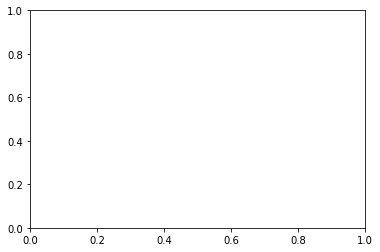

In [109]:
fig, ax = plt.subplots()
# plt.errorbar(x1a, y1a, xerr=xerr1, yerr=yerr1, ls='', color='dodgerblue', marker='o', ms=8)
# plt.scatter(x1a, y1a,color='dodgerblue', marker='o', s=56, label='2cm Spacing - Argon CO2')
# plt.errorbar(x2a, y2a, xerr=xerr2, yerr=yerr2, ls='', color='blueviolet', marker='o', ms=8)
# plt.scatter(x2a, y2a,color='blueviolet', marker='o', s=56, label='2cm Spacing - Argon CH4')
# plt.errorbar(x3a,y3a, xerr=xerr3, yerr=yerr3, ls='', color='tomato', marker='o', ms=8)
# plt.scatter(x3a,y3a,  color='tomato', marker='o', s=56, label='2cm Spacing - Argon')

plt.errorbar(x4a, y4a, xerr=xerr4, yerr=yerr4, ls='', color='dodgerblue', marker='^', ms=8, label='1mm Spacing - Argon CO2')
# plt.scatter(x4a, y4a,color='dodgerblue', marker='^', s=56, label='1mm Spacing - Argon CO2')
plt.errorbar(x5a, y5a, xerr=xerr5, yerr=yerr5, ls='', color='blueviolet', marker='^', ms=8)
plt.scatter(x5a, y5a,color='blueviolet', marker='^', s=56, label='1mm Spacing - Argon CH4')
plt.errorbar(x24a, y24a, xerr=xerr24, yerr=yerr24, ls='', color='red', marker='^', ms=8)
plt.scatter(x24a, y24a,color='red', marker='^', s=56, label='1mm Spacing - Argon CH4')
plt.errorbar(x6a, y6a, xerr=xerr6, yerr=yerr6, ls='', color='tomato', marker='^', ms=8)
plt.scatter(x6a, y6a,color='tomato', marker='^', s=56, label='1mm Spacing - Argon')
plt.errorbar(x20a, y20a, xerr=xerr20, yerr=yerr20, ls='', color='limegreen', marker='^', ms=8)
plt.scatter(x20a, y20a,color='limegreen', marker='^', s=56, label='1mm Spacing - CO2')

plt.errorbar(x7a, y7a, xerr=xerr7, yerr=yerr7, ls='', color='dodgerblue', marker='s', ms=8)
plt.scatter(x7a, y7a,color='dodgerblue', marker='s', s=56, label='1cm Spacing - Argon CO2')
plt.errorbar(x8a, y8a, xerr=xerr8, yerr=yerr8, ls='', color='blueviolet', marker='s', ms=8)
plt.scatter(x8a, y8a,color='blueviolet', marker='s', s=56, label='1cm Spacing - Argon CH4')
plt.errorbar(x25a, y25a, xerr=xerr25, yerr=yerr25, ls='', color='red', marker='s', ms=8)
plt.scatter(x25a, y25a,color='red', marker='s', s=56, label='1cm Spacing - Argon CH4')
plt.errorbar(x9a, y9a, xerr=xerr9, yerr=yerr9, ls='', color='tomato', marker='s', ms=8)
plt.scatter(x9a, y9a,color='tomato', marker='s', s=56, label='1cm Spacing - Argon')
plt.errorbar(x22a, y22a, xerr=xerr22, yerr=yerr22, ls='', color='limegreen', marker='s', ms=8)
plt.scatter(x22a, y22a,color='limegreen', marker='s', s=56, label='1cm Spacing - CO2')

# plt.errorbar(x10a, y10a, xerr=xerr10, yerr=yerr10, ls='', color='dodgerblue', marker='X', ms=10)
# plt.scatter(x10a, y10a,color='dodgerblue', marker='X', s=56, label='5mm Spacing - Argon CO2')
# plt.errorbar(x11a, y11a, xerr=0.25, yerr=yerr11, ls='', color='blueviolet', marker='X', ms=10)
# plt.scatter(x11a, y11a,color='blueviolet', marker='X', s=56, label='5 mm Spacing - Argon CH4')
# plt.errorbar(x12a, y12a, xerr=xerr12, yerr=yerr12, ls='', color='tomato', marker='X', ms=10)
# plt.scatter(x12a, y12a,color='tomato', marker='X', s=56, label='5mm Spacing - Argon')

plt.errorbar(x19a, y19a, xerr=xerr19, yerr=yerr19, ls='', color='limegreen', marker='.', ms=10)
plt.scatter(x19a, y19a,color='limegreen', marker='.', s=56, label='1mm Spacing - CO2')
plt.errorbar(x15a,y15a, xerr=xerr15, yerr=yerr15, ls='', color='tomato', marker='.', ms=10)
plt.scatter(x15a,y15a,  color='tomato', marker='.', s=56, label='1mm Spacing - Argon')
plt.errorbar(x21a, y21a, xerr=xerr21, yerr=yerr21, ls='', color='dodgerblue', marker='.', ms=10)
plt.scatter(x21a, y21a,color='dodgerblue', marker='.', s=56, label='1mm Spacing - Argon CO2')
plt.errorbar(x23a, y23a, xerr=xerr23, yerr=yerr23, ls='', color='blueviolet', marker='.', ms=10)
plt.scatter(x23a, y23a,color='blueviolet', marker='.', s=56, label='1mm Spacing - Argon CH4')

ax.set_yscale('log')
ax.set_xscale('log')
fig.set_figheight(10)
fig.set_figwidth(15)

# ax.set_xlim([1e-2,30])

plt.xlabel('Pressure-Length, torr-cm', fontsize=24)
plt.ylabel('Voltage at Breakdown, V', fontsize=24)
plt.legend(fontsize=18, borderaxespad=1, loc="best")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.grid()

plt.tight_layout()
# plt.savefig('logplot.png', dpi=400)

# plt.scatter(p*d, Vb)

plt.show()


In [103]:
p = np.arange(.4, 1e4, .01)
d = 1
gammase = .01
# Aco = 12
# Bco = 203
Aco = 12
Bco = 180
Cco = 946.205
k=.86
# k=.78

Vb = 1*p*Bco/(np.log(Aco*p*1/np.log(1+1/gammase))) #OG Paschen Curve

Vb2 = 1*p*Bco/(np.log(Aco*p*1/np.log(10^8))) #Meek Criterion Paschen Curve

# Vb3 = 1*p**k*Bco/(np.log(1*p*Aco/np.log(1+1/gammase)-p*Aco/Cco)) #Modified Paschen Formula



In [104]:
pd_10mil = np.array([75.819,  66.675,  56.9595, 47.625,  37.9095, 27.813,  19.05,   17.3355, 15.24,
 13.335,  11.43,    9.525,   7.62,    5.5245,  3.2385])
v_10mil = np.array([1033.33333333,  951.66666667,  856.66666667,  780.,          691.66666667,
  570.,          450.,          426.33333333,  397.33333333,  371.66666667,
  344.33333333,  316.33333333,  285.66666667,  257.33333333,  221.66666667])
pd10mil_err = np.array([7.58429284, 6.67022087, 5.69913473, 4.76630848, 3.79573341, 2.78781634,
 1.91450131, 1.74398562, 1.5358601,  1.34703842, 1.15876626, 0.97136322,
 0.78545162, 0.58437253, 0.37572473])
v10mil_err = np.array([47.14045208, 18.40893503,  4.71404521,  4.0824829,   6.23609564,  4.0824829,
  0.,          2.62466929,  1.88561808,  2.3570226,   0.47140452,  1.24721913,
  3.09120617,  1.88561808,  1.24721913])

lep = np.arange(1, 10.5, .5)
ledat = np.array([[3.5,3.3,3.3,3.3],[4,3.8,3.8,3.9],[4.5,4.4,4.4,4.4],[4.8,5,4.9,5],[5.5,5.5,5.6,5.5],[6,6.1,6.1,6.1],[6.6,6.6,6.6,6.6],[7,7.1,7,7],[7.5,7.5,7.5,7.4],[8,8,7.9,7.9],[8.4,8.3,8.3,8.3],[8.6,8.7,8.6,8.7],[9,9,9.1,9],[9.4,9.3,9.4,9.3],[9.6,9.6,9.6,9.6],[9.9,9.9,10,9.9],[10.2,10.3,10.2,10.3],[10.5,10.5,10.5,10.5],[10.9,10.8,10.9,10.8]])
ledatm = []

for i in range(len(ledat)):
    ledatm.append(np.mean(ledat[i], axis = 0)*1000)

leerr = np.array([.0353,.0359,.024,.027,.0345,.04,.0442,.03553,.0519,.0456,.0536,.0552,.046,.0365,.0467,.0553,.0525,.0648,.0476])

print(leerr)
print(len(ledatm))
print(len(lep))

[0.0353  0.0359  0.024   0.027   0.0345  0.04    0.0442  0.03553 0.0519
 0.0456  0.0536  0.0552  0.046   0.0365  0.0467  0.0553  0.0525  0.0648
 0.0476 ]
19
19


NameError: name 'x6a' is not defined

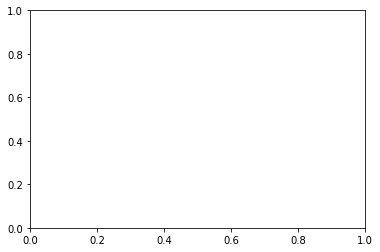

In [107]:
fig, ax = plt.subplots()
plt.errorbar(x6a, y6a, xerr=xerr6, yerr=yerr6, ls='', color='tomato', marker='^', ms=8)
plt.scatter(x6a, y6a,color='tomato', marker='^', s=56, label='1mm Spacing ')
plt.errorbar(x9a, y9a, xerr=xerr9, yerr=yerr9, ls='', color='tomato', marker='s', ms=8)
plt.scatter(x9a, y9a,color='tomato', marker='s', s=56, label='1cm Spacing')
plt.errorbar(x12a, y12a, xerr=xerr12, yerr=yerr12, ls='', color='tomato', marker='X', ms=8)
plt.scatter(x12a, y12a,color='tomato', marker='X', s=56, label='5mm Spacing - (1 to 10)')
plt.errorbar(x13a,y13a, xerr=xerr13, yerr=yerr13, ls='', color='blueviolet', marker='X', ms=8)
plt.scatter(x13a,y13a,  color='blueviolet', marker='X', s=56, label='5mm Spacing - (10 to 1)')
plt.errorbar(x14a,y14a, xerr=xerr14, yerr=yerr14, ls='', color='blueviolet', marker='^', ms=8)
plt.scatter(x14a,y14a,  color='blueviolet', marker='^', s=56, label='1mm Spacing - (Test 2)')
plt.errorbar(x15a,y15a, xerr=xerr15, yerr=yerr15, ls='', color='dodgerblue', marker='^', ms=8)
plt.scatter(x15a,y15a,  color='dodgerblue', marker='^', s=56, label='1mm Spacing')
plt.errorbar(x16a,y16a, xerr=xerr16, yerr=yerr16, ls='', color='dodgerblue', marker='^', ms=8)
plt.scatter(x16a,y16a,  color='dodgerblue', marker='^', s=56, label='1mm Spacing - (Test 3)')
plt.errorbar(x17a,y17a, xerr=xerr17, yerr=yerr17, ls='', color='blueviolet', marker='.', ms=8)
plt.scatter(x17a,y17a,  color='blueviolet', marker='.', s=56, label='0.1mm Spacing')
plt.errorbar(x18a,y18a, xerr=xerr18, yerr=yerr18, ls='', color='blueviolet', marker='.', ms=8)
plt.scatter(x18a,y18a,  color='blueviolet', marker='.', s=56, label='0.1mm Spacing')

# plt.errorbar(pd_10mil,v_10mil, xerr=pd10mil_err, yerr=v10mil_err, ls='', marker='o', color='r')
# plt.errorbar(pd_10mil,v_10mil, ls='', marker='o', color='r', label='Katherine\'s Data')
# plt.errorbar(lep*.52*760,ledatm, xerr=.125*760, yerr=leerr*1000, ls='', marker='o', color='b')
# plt.errorbar(lep*.52*760,ledatm, ls='', marker='o', color='b', label='Leslie\'s Data')

ax.set_yscale('log')
ax.set_xscale('log')
fig.set_figheight(10)
fig.set_figwidth(15)

plt.plot(p, Vb, label='Original Paschen Curve Formula')

# plt.plot(p, Vb2, label='Meek Criterion Formula')

# plt.plot(p, Vb3, label='Modified Formula')


plt.xlabel('Pressure-Length, torr-cm', fontsize=24)
plt.ylabel('Voltage at Breakdown, V', fontsize=24)
plt.legend(fontsize=18, borderaxespad=1, loc="upper left")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# ax.set_ylim([30,1e6])
# ax.set_xlim([1e-1,1e4])
# pltplt.ylim(.grid())
plt.tight_layout()

# plt.savefig('Arlogplot5.png',dpi=400)

plt.show()

NameError: name 'p6a' is not defined

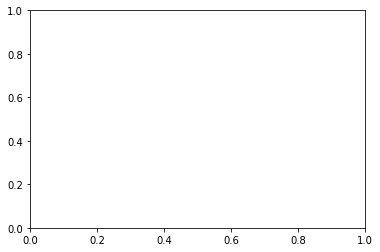

In [106]:
fig, ax = plt.subplots()
plt.errorbar(p6a, E6a, xerr=xerr6, yerr=yerr6, ls='', color='tomato', marker='^', ms=8)
plt.scatter(p6a, E6a,color='tomato', marker='^', s=56, label='1mm Spacing - Argon')
plt.errorbar(p9a, E9a, xerr=xerr9, yerr=yerr9, ls='', color='tomato', marker='s', ms=8)
plt.scatter(p9a, E9a,color='tomato', marker='s', s=56, label='1cm Spacing - Argon')
plt.errorbar(p12a, E12a, xerr=xerr12, yerr=yerr12, ls='', color='tomato', marker='X', ms=8)
plt.scatter(p12a, E12a,color='tomato', marker='X', s=56, label='5mm Spacing - Argon (1 to 10)')
plt.errorbar(p13a,E13a, xerr=xerr13, yerr=yerr13, ls='', color='blueviolet', marker='X', ms=8)
plt.scatter(p13a,E13a,  color='blueviolet', marker='X', s=56, label='5mm Spacing - Argon (10 to 1)')
plt.errorbar(p14a,E14a, xerr=xerr14, yerr=yerr14, ls='', color='blueviolet', marker='^', ms=8)
plt.scatter(p14a,E14a,  color='blueviolet', marker='^', s=56, label='1mm Spacing - Argon (Test 2)')
plt.errorbar(p15a,E15a, xerr=xerr15, yerr=yerr15, ls='', color='dodgerblue', marker='^', ms=8)
plt.scatter(p15a,E15a,  color='dodgerblue', marker='^', s=56, label='1mm Spacing - Argon')
plt.errorbar(p16a,E16a, xerr=xerr16, yerr=yerr16, ls='', color='dodgerblue', marker='^', ms=8)
plt.scatter(p16a,E16a,  color='dodgerblue', marker='^', s=56, label='1mm Spacing - Argon (Test 3)')


# plt.errorbar(pd_10mil,v_10mil, xerr=pd10mil_err, yerr=v10mil_err, ls='', marker='o', color='r')
# plt.errorbar(pd_10mil,v_10mil, ls='', marker='o', color='r', label='Katherine\'s Data')
# plt.errorbar(lep*.52*760,ledatm, xerr=.125*760, yerr=leerr*1000, ls='', marker='o', color='b')
# plt.errorbar(lep*.52*760,ledatm, ls='', marker='o', color='b', label='Leslie\'s Data')

# ax.set_yscale('log')
# ax.set_xscale('log')
fig.set_figheight(10)
fig.set_figwidth(15)

plt.plot(p, Vb, label='Original Paschen Curve Formula')

# plt.plot(p, Vb2, label='Meek Criterion Formula')
 
# plt.plot(p, Vb3, label='Modified Formula')


plt.xlabel('Pressure, torr', fontsize=18)
plt.ylabel('Electric Field at Breakdown, V/cm', fontsize=18)
plt.legend(fontsize=18, borderaxespad=1, loc="upper left")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# ax.set_ylim([10,1e5])
# ax.set_xlim([1e-1,5e4])
# pltplt.ylim(.grid())
plt.tight_layout()

plt.show()